## PyHelios Avanzado

Se propone el siguiente ejercicio que mezcla los distintos conceptos aprendidos en los bloques HELIOS básico, avanzado y PyHelios.

### Modelo general

Sea un coche $(x(t), y(t), z(t)) = (x(t), 50, 0)$ que se mueve en la dirección del eje $\pmb{e_1}$ de la base canónica en el espacio Euclídeo (eje $x$). Se considera la posición inicial del coche como $x(0)=-100\;\mathrm{m}$ y la final como $x(t_*+T)=100\;\mathrm{m}$, siendo $v^* \in \mathbb{R}_{>0}$ la velocidad máxima que éste puede alcanzar. El valor $t_*\in\mathbb{R}_{>0}$ antes mencionado correspondería al momento en que comienza la desaceleración y $T\in\mathbb{R}_{>0}$ a la duración de la fase de desaceleración desde $v^*$ hasta cero. Además, puede hablarse de $t^*=0+T=T$ como el instante en el que termina de acelerar el coche desde cero hasta $v^*$, ya que se presupone que se acelera y desacelera con el siguiente modelo (donde $\lambda \in \mathbb{R}_{>0}$ da la pendiente de la aceleración/desaceleración lineal):

$$
\left\{\begin{split}
a(t) =&\; \lambda t &\;,\quad& t \leq t^* \\
a(t) =&\; 0 &\;,\quad& t^* < t < t_* \\
a(t) =&\; -\lambda (t-t_*) &\;,\quad& t_* \leq t \leq t_*+T
\end{split}\right.
$$

El cual debe satisfacer:

$$
v(0) = 0 \;,\quad v(t^* < t < t_*) = v^* \;,\quad v(t_*+T) = 0
$$

### Modelo de simulación

Supóngase $T=5$ segundos y $v^* = 10\;\mathrm{m}/\mathrm{s}$ e impleméntese el coche utilizando movimientos rígidos con $100$ traslaciones por segundo. Colóquese un escáner terrestre RIEGL VZ400 en un trípode en la posición $(0, 0, 0)$ mirando hacia el punto $(0, 50)$ con un campo de visión horizontal entre los $[-45, 45]$ grados y un campo de visión vertical entre los $[-30, 30]$ grados. El escáner debe realizar $100$ scanlines por segundo de $1,000$ pulsos cada una. El escáner debe hacer tantos barridos como sea necesario para cubrir los $t_* + T$ segundos que dura el movimiento del coche. Por conveniencia, debe fijarse que el tiempo de inicio de la simulación es el segundo cero.

### Estudio comparativo

Comparar la velocidad estimada de cada coche en el tiempo a partir de la nube simulada con la velocidad del modelo analítico. 

1. Variando el número de barridos por segundo.
2. Variando la distancia en el plano entre el LiDAR y el punto de referencia $(0, 50)$ (equidistante a $100\;\mathrm{m}$ respecto de la posición inicial de cada coche). *Pista: Se recomienda cambiar la coordenada $y$ donde se coloca el escáner.*

De la anterior comparativa buscar el mejor resultado en términos de error cuadrático promedio y completar el estudio conservando constantes sus parámetros pero:

3. Variando la velocidad máxima del vehículo.

Para estimar la velocidad de los coches en la nube se divide la distancia Euclídea entre el centro de la bounding box entre escaneos consecutivos, divida entre la diferencia temporal.

In [2]:
# Configurar entorno Jupyter
%config Completer.use_jedi = False

# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import time

# Importar pyhelios
PYHELIOS_LIB_PATH = '/home/uadmin/git/helios/cmake-build-release'
HELIOS_PATH = '/home/uadmin/git/helios'
sys.path.append(PYHELIOS_LIB_PATH)
sys.path.append(HELIOS_PATH)
if os.getcwd().endswith('pyhelios'):
    os.chdir(os.path.dirname(os.getcwd()))
import pyhelios

In [3]:
# TODO : Codifica aquí la solución al ejercicio

## Solución

A continuación, se ofrece una posible solución al ejercicio propuesto.

### Implementando el modelo

En primer lugar, se implementa el modelo.

La velocidad se determina teniendo en cuenta que:

$$
v(t) = \int{a(t) dt}
$$

La posición debe ser:

$$
x(t) = \int{v(t) dt}
$$


Entonces, cuando $0 \leq t \leq t^*$:

$$
a(t) = \lambda t \;,\quad
v(t) = \dfrac{\lambda}{2} t^2 \;,\quad
x(t) = \frac{\lambda}{6} t^3
$$

Cuando $t^* < t < t_*$:

$$
a(t) = 0 \;,\quad
v(t) = v^* \;,\quad
x(t) = x(t^*) + (t-t^*)v^*
$$

Cuando $t_* \leq t \leq t_*+T$, siendo $\tau = t-t_*$:

$$
\begin{split}
a(t) = a(\tau) =&\;
    - \lambda (t-t_*) \\
v(t) = v(\tau) =&\; 
    \int{\left({- \lambda \tau}\right)d\tau} =
    v^* - \dfrac{\lambda}{2} \tau^2 =
    v^* - \dfrac{\lambda}{2} \left(t-t_*\right)^2 \\
x(t) = x(\tau) =&\;
    \int{\left({v^* - \dfrac{\lambda}{2}\tau^2}\right) d\tau} =
    x(t_*) + v^*\tau - \dfrac{\lambda}{6} \tau^3 =
    x(t_*) + v^*(t-t_*) - \dfrac{\lambda}{6} \left(t-t_*\right)^3
\end{split}
$$

Falta resolver para $\lambda$ y para $t_*$, para ello conviene recordar que $t^* = T$. Empezando por $\lambda$:

$$
v(t^*) = \dfrac{\lambda}{2}(t^*)^2 = v^* \iff 
    \lambda = \dfrac{2v^*}{(t^*)^2} = \dfrac{2v^*}{T^2}
$$

Para este caso, $T=5\;\mathrm{s}$ y $v^* = 10\; \mathrm{m}/\mathrm{s}$, por lo que $\lambda = 0.8$.

Terminando por $t_*$ y notando por $D$ la distancia máxima:

$$
x(t_*+T) = 
    x(t_*+t^*) = 
    x(t_*) + v^*t^* - \dfrac{\lambda}{6}(t^*)^3 =
    (t_* - t^*)v^* + v^*t^* = 
    D \iff
    t_* = \dfrac{D}{v^*}
$$

En este caso $D=200\;\mathrm{m}$ por lo que $t_* = 20\;\mathrm{s}$.

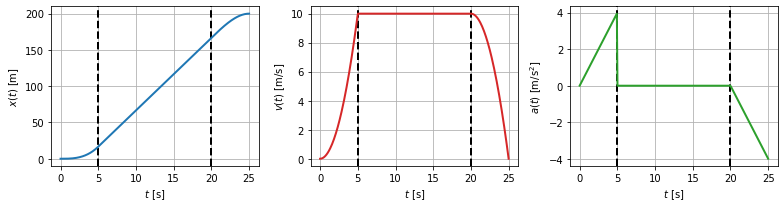

In [20]:
# ---  FASE DE ACELERACIÓN  --- #
# ----------------------------- #
def accel_a(t, lamb):
    return lamb*t

def accel_v(t, lamb):
    return lamb/2*t*t

def accel_x(t, lamb):
    return lamb/6*t*t*t


# ---  FASE DE VIAJE  --- #
# ----------------------- #
def travel_a(t):
    return 0

def travel_v(t, vmax):
    return vmax

def travel_x(t, lamb, t_accel, vmax):
    return accel_x(t_accel, lamb) + (t-t_accel)*vmax


# ---  FASE DE DESACELERACIÓN  --- #
# -------------------------------- #
def decel_a(t, lamb, t_decel, vmax):
    return -lamb*(t-t_decel)

def decel_v(t, lamb, t_decel, vmax):
    return vmax - lamb/2*(t-t_decel)**2

def decel_x(t, lamb, t_accel, t_decel, vmax):
    return (
        travel_x(t_decel, lamb, t_accel, vmax) +  # x(t_*) +
        vmax * (t-t_decel) -  # v^* (t-t_*) -
        lamb/6*(t-t_decel)**3  # lambda/6 (t-t_*)^3
    )
    
# ---  MODELO GENERAL  --- #
# ------------------------ #
MODELO_DISTANCIA = 200  # m
MODELO_T = 5.0  # s
MODELO_vmax = 10.0  # m/s
MODELO_lambda = 2*MODELO_vmax / (MODELO_T * MODELO_T)  # m/s^3
MODELO_DISTANCIA_T = MODELO_lambda/6 * MODELO_T*MODELO_T*MODELO_T  # m, x(t^*)
MODELO_t_decel = MODELO_DISTANCIA / MODELO_vmax  # s
MODELO_t_start = 0  # s
MODELO_t_end = MODELO_t_decel + MODELO_T  # s

def a(t):
    if t <= MODELO_T:  # t <= t^*
        return accel_a(t, MODELO_lambda)
    elif t >= MODELO_t_decel:
        return decel_a(t, MODELO_lambda, MODELO_t_decel, MODELO_vmax)
    else:
        return travel_a(t)
    
def v(t):
    if t <= MODELO_T:  # t <= t^*
        return accel_v(t, MODELO_lambda)
    elif t >= MODELO_t_decel:
        return decel_v(t, MODELO_lambda, MODELO_t_decel, MODELO_vmax)
    else:
        return travel_v(t, MODELO_vmax)
    
def x(t):
    if t <= MODELO_T:  # t <= t^*
        return accel_x(t, MODELO_lambda)
    elif t >= MODELO_t_decel:
        return decel_x(t, MODELO_lambda, MODELO_T, MODELO_t_decel, MODELO_vmax)
    else:
        return travel_x(t, MODELO_lambda, MODELO_T, MODELO_vmax)
    
# Figura del modelo general
t = np.linspace(MODELO_t_start, MODELO_t_end, 300)
fig = plt.figure(figsize=(11, 3))

# Gráfico de posición
ax = fig.add_subplot(1, 3, 1)
ax.plot(t, [x(ti) for ti in t], color='tab:blue', lw=2, zorder=5)
ax.axvline(MODELO_T, color='black', lw=2, ls='--', zorder=3)
ax.axvline(MODELO_t_decel, color='black', lw=2, ls='--', zorder=3)
ax.set_xlabel(r'$t$ [s]')
ax.set_ylabel(r'$x(t)$ [m]')
ax.grid('both')
ax.set_axisbelow(True)

# Gráfico de velocidad
ax = fig.add_subplot(1, 3, 2)
ax.plot(t, [v(ti) for ti in t], color='tab:red', lw=2, zorder=5)
ax.axvline(MODELO_T, color='black', lw=2, ls='--', zorder=3)
ax.axvline(MODELO_t_decel, color='black', lw=2, ls='--', zorder=3)
ax.set_xlabel(r'$t$ [s]')
ax.set_ylabel(r'$v(t)$ [m/s]')
ax.grid('both')
ax.set_axisbelow(True)



# Gráfico de aceleración
ax = fig.add_subplot(1, 3, 3)
ax.plot(t, [a(ti) for ti in t], color='tab:green', lw=2, zorder=5)
ax.axvline(MODELO_T, color='black', lw=2, ls='--', zorder=3)
ax.axvline(MODELO_t_decel, color='black', lw=2, ls='--', zorder=3)
ax.set_xlabel(r'$t$ [s]')
ax.set_ylabel(r'$a(t)$ [$\mathrm{m}/\mathrm{s}^2$]')
ax.grid('both')
ax.set_axisbelow(True)

# Mostrar figura
fig.tight_layout()
plt.show()